# Portfolio Analysis
author: Jan Erish Baluca
LinkedIn: https://www.linkedin.com/in/jan-erish-baluca-099569103/

Dataset Source: Datacamp

In [14]:
# Define the vector values
values <- c(500000, 200000, 100000, 20000)
names(values) <- c('Inv 1', 'Inv 2', 'Inv 3', 'Inv 4')
portfolio <- as.data.frame(values)

# Define the vector weights
portfolio$weights <- values / sum(values)

# Print the resulting weights
portfolio

,values,weights
Inv 1,5e+05,0.60975610
Inv 2,2e+05,0.24390244
Inv 3,1e+05,0.12195122
Inv 4,2e+04,0.02439024


# Portfolio Returns
### Relative Value  

The return of an asset is its simple return (its final value less its initial value) divided by its initial value. The relative return of a portfolio is the summation of every asset return multiplied that has been multiplied by its respective asset weight.

In [15]:
# building the portfolio
assets <- c('Asset_1','Asset_2','Asset_3')
initial_value <- c(1000, 5000, 2000)
final_value <- c(1100,4500,3000)
portfolio <- data.frame(initial_value,final_value)
rownames(portfolio) <- assets

# calculating asset weights
portfolio$weights <- portfolio$initial_value / sum(portfolio$initial_value)

# calculating asset returns
portfolio$returns <- (portfolio$final_value - portfolio$initial_value) / portfolio$initial_value

# calculating weighted asset returns
portfolio$weighted_returns <- portfolio$returns * portfolio$weights
portfolio

# calculated weighted portfolio returns
sum(portfolio$weighted_returns)

,initial_value,final_value,weights,returns,weighted_returns
Asset_1,1000,1100,0.125,0.1,0.0125
Asset_2,5000,4500,0.625,-0.1,-0.0625
Asset_3,2000,3000,0.250,0.5,0.1250


[1] 0.075

# Time Series: Returns

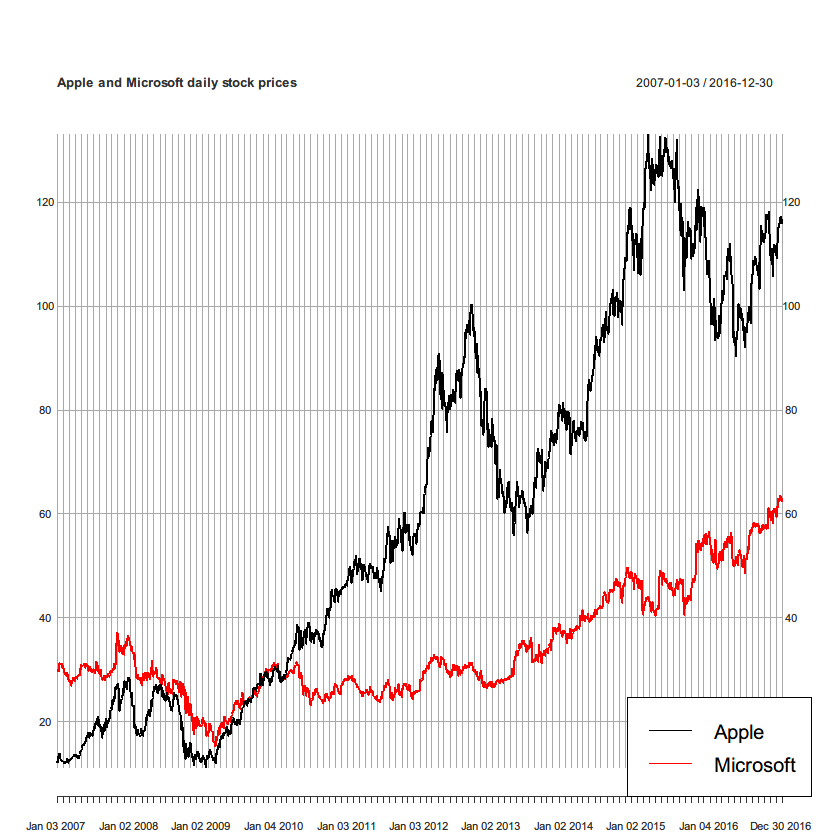

In [16]:
# importing time series data: prices
library(xts)
library(zoo)
library(PerformanceAnalytics)
prices <- read.csv('msft_aapl.csv')
prices$date <- as.Date(prices$date)
prices <- xts(x=prices[,c(2,3)], order.by=prices$date)

# plotting time series data: prices
plot(prices, main="Apple and Microsoft daily stock prices")
legend(x="bottomright", legend=c("Apple","Microsoft"), col=c("black","red"), lty=c(1,1))

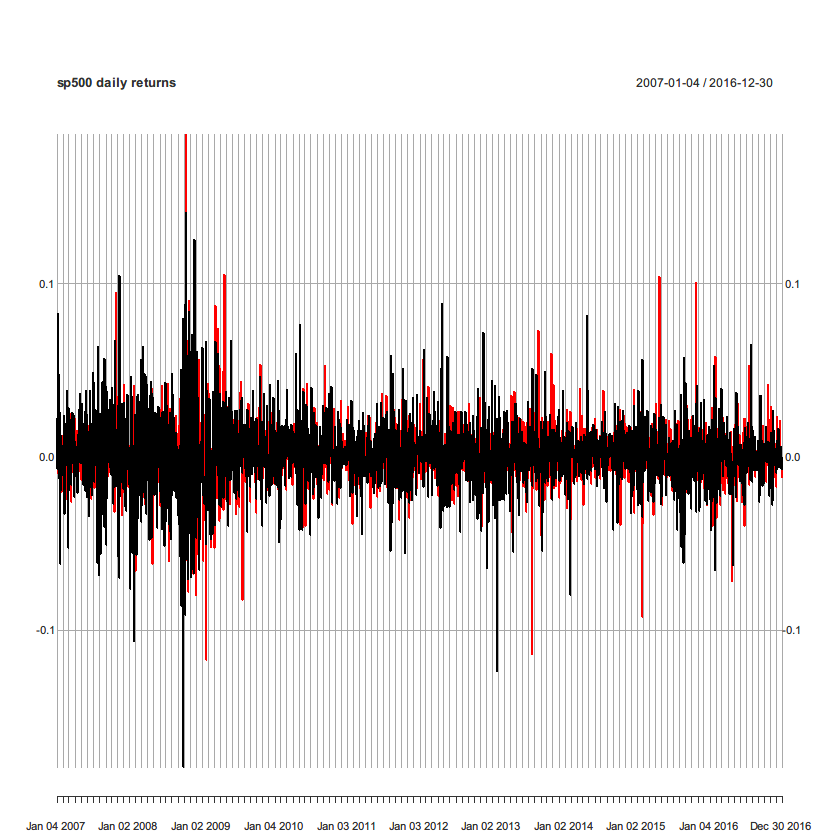

In [17]:
# Calculate daily returns
returns <- Return.calculate(prices)
returns <- returns[-1,]

# Plotting daily returns
plot(returns, main="sp500 daily returns")

# Portfolio Performance

In order to evaluate our portfolio's performance, we will use SP500 performance as a benchmark.

         sp500.Open sp500.High sp500.Low sp500.Close
Jun 2007    1503.35    1503.35   1503.35     1503.35
Jul 2007    1519.43    1553.08   1455.27     1455.27
Aug 2007    1465.81    1497.49   1406.70     1473.99
Sep 2007    1489.42    1531.38   1451.70     1526.75
Oct 2007    1547.04    1565.15   1500.63     1549.38
Nov 2007    1508.44    1520.27   1407.22     1481.14

[1] "Mean of SP500 Monthly Returns: 0.00452014912280702"

[1] "Geometric Mean of SP500 Monthly Returns: 1.00401539236417"

[1] "Volatility of SP500 Monthly Returns 0.0449319383692128"

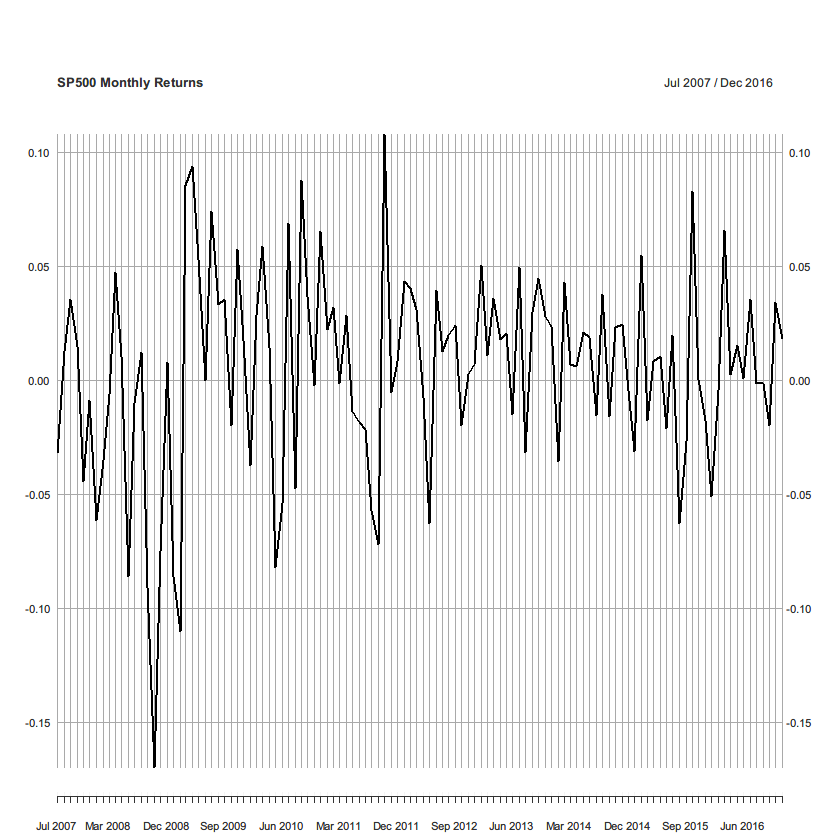

In [18]:
# importing sp500 data
sp500 <- read.csv('sp500.csv')
rownames(sp500) <- sp500$date
sp500$date <- NULL
sp500 <- as.xts(sp500)

# Convert daily frequency data to monthly
sp500_monthly <- to.monthly(sp500)
head(sp500_monthly)

# Calculate monthly returns using closing prices
sp500_monthly_returns <- round(Return.calculate(sp500_monthly[,4]), digits=6)

# Filling in missing data: forward-fill
sp500_monthly_returns <- na.locf(sp500_monthly_returns)
sp500_monthly_returns <- sp500_monthly_returns[-1,]

# Plot
plot(sp500_monthly_returns, main="SP500 Monthly Returns")


# Compute mean of monthly returns
paste0("Mean of SP500 Monthly Returns: ", mean(sp500_monthly_returns))
# Compute geometric mean of monthly returns
paste0("Geometric Mean of SP500 Monthly Returns: ",mean.geometric(sp500_monthly_returns + 1))
# Compute the volatility (standard deviation) of monthly returns
paste0("Volatility of SP500 Monthly Returns ", sd(sp500_monthly_returns))

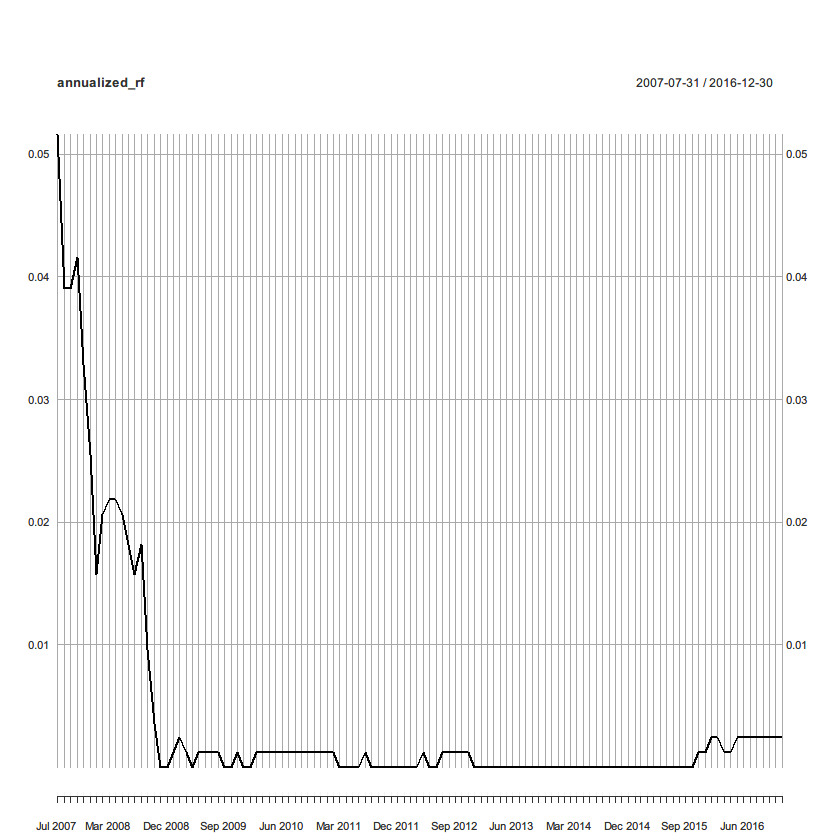

In [19]:
library(readxl)

# Importing risk-free rate data
rf <- read_excel('t_bill_rates.xlsx')
rf <- as.data.frame(rf)
rownames(rf) <- rf$date
rf$date <- NULL
rf <- as.xts(rf)

# slicing needed date range
rf <- rf[paste0(as.Date(index(sp500_monthly_returns)[1]),"/", as.Date(index(sp500_monthly_returns)[length(sp500_monthly_returns)]))]

# extending data to fill required date range
added <- data.frame(date=c("2016-09-30","2016-10-31","2016-11-30","2016-12-30"), rf=c(0.0002,0.0002,0.0002,0.0002))
added <-as.data.frame(added)
rownames(added) <- added$date
added$date <- NULL
added <- as.xts(added)
rf <- rbind(rf, added)

# Annualized Risk-free Rate
annualized_rf = (1 + rf)^12 - 1
plot(annualized_rf)

In [20]:
# Compute the excess portfolio returns
sp500_excess <- as.data.frame(sp500_monthly_returns) - as.data.frame(rf)
colnames(sp500_excess) <- "Excess"

# Comparing the means
paste0("Mean of SP500 monthly returns: ",mean(sp500_monthly_returns))
paste0("Mean of SP500 nexcess monthly returns: ", mean(sp500_excess$Excess))

# Sharpe Ratio
sp500_sharpe <- mean(sp500_excess$Excess) / sd(sp500_monthly_returns)
paste0("SP500 Sharpe Ratio: ",sp500_sharpe)

[1] "Mean of SP500 monthly returns: 0.00452014912280702"

[1] "Mean of SP500 nexcess monthly returns: 0.0041885701754386"

[1] "SP500 Sharpe Ratio: 0.093220331182253"

In [21]:
table.AnnualizedReturns(sp500_monthly_returns)


,sp500.Close
Annualized Return,0.0428
Annualized Std Dev,0.1556
Annualized Sharpe (Rf=0%),0.2751


In [24]:
summary(sp500_monthly_returns)
head(sp500_monthly_returns)

     Index       sp500.Close       
 Min.   :2008   Min.   :-0.169425  
 1st Qu.:2010   1st Qu.:-0.018076  
 Median :2012   Median : 0.009512  
 Mean   :2012   Mean   : 0.004520  
 3rd Qu.:2015   3rd Qu.: 0.033159  
 Max.   :2017   Max.   : 0.107723  

         sp500.Close
Jul 2007   -0.031982
Aug 2007    0.012864
Sep 2007    0.035794
Oct 2007    0.014822
Nov 2007   -0.044043
Dec 2007   -0.008628

In [23]:
sum(sp500_monthly_returns)
nrow(sp500_monthly_returns)

[1] 0.515297

[1] 114